# 1. Playing in Ipython

## Start in Ipython

I always start coding in ipython to quickly prototype code and play around.

However, Ipython is not a real development environment; when things get serious, I start making my own packages with PyCharm and version control software. Things will quickly become too complex if you only stay in ipython!

### examples of playing around

IPython (now being renamed to Jupyter) is awesome. You can do all sorts of fun stuff, i.e.

In [2]:
#used to import plotting stuff
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns # Makes plots prettier
sns.set_context('poster', font_scale=1.25)

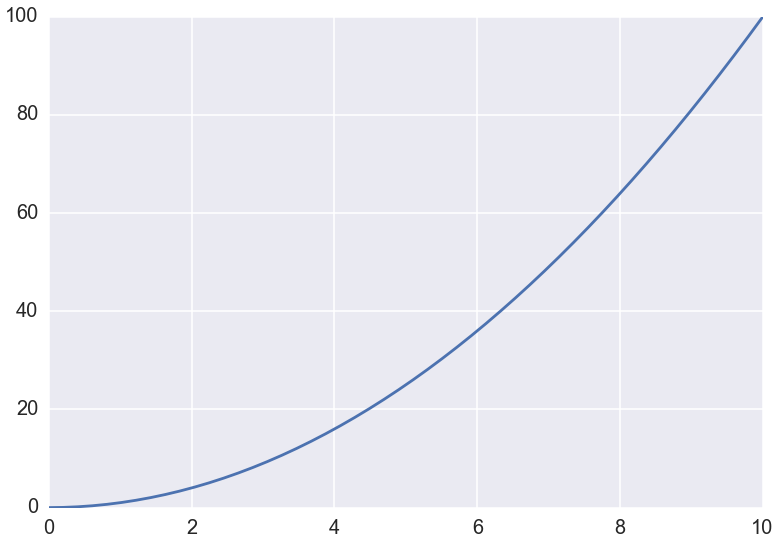

In [4]:
x = np.linspace(0, 10)
plt.plot(x, x**2)

You can also type in Markdown, i.e.

* Hi
   * Hello
* Math is fun $x^2 + y^2 + z^2$

You can also pull in fun things from the web, i.e.

In [2]:
import IPython.display as d

In [5]:
d.Image(url='http://www.nyan.cat/cats/original.gif')

In [3]:
d.Image(url='https://media.giphy.com/media/eYUGlqcvDek2k/giphy.gif')

You can quickly prototype code. Let's make a do-work function.

In [6]:
def do_work(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [7]:
%timeit do_work()

10 loops, best of 3: 84.1 ms per loop


You can quickly prototype code in cython as well.

In [ ]:
%load_ext cython

In [ ]:
%%cython -a 

cpdef do_work_faster(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [10]:
%timeit do_work_faster()

10 loops, best of 3: 34.4 ms per loop


Yellow lines are bad. We need to optimize our code.

In [11]:
%%cython -a 

cpdef int do_work_fastest(int num_simulations=10**6):
    cdef int x = 0
    cdef int i
    with nogil:
        for i in range(num_simulations):
            x += 1
        return x

In [12]:
%timeit do_work_fastest()

The slowest run took 82.14 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 133 ns per loop


Ok that is pretty fast.

## Question

When our code becomes too complicated in IPython, where do we go? Pycharm! Or another development environment. I like Pycharm.

# 2. Pycharm

In [41]:
d.IFrame('https://www.jetbrains.com/pycharm/', 1000, 250)

We copy and paste our code into pycharm and organize it in a coherent manner. We then create a "setup" script that pycharm will automatically generate for us.

We then run the command when in the directory of the package

`pip install --editable .`

To install our package locally. The `--editable` flag is important; when we alter the program in the package, the changes will immediately show up everywhere else (this is what we want when developing).

When we want to install something for real, we run

`pip install .`

## Interacting with the Package in pycharm

Pycharm features a number of nice things like a matlab-like debugger. I generally don't use this, although I probably should, I usually just debug things in IPython. I use a debugger if things get super complicated.

In [19]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%autoreload 2

This will definitely make it that changes in the package show up immediately.

In [29]:
from my_python_workflow import py_work as pw

In [30]:
pw.do_work_in_pycharm()

1000000

**We version control our code with git.**

Remember: the master branch is sacred! Put your playing in different branches.

# 3. Compiling into cython in your package

This is more tricky, but still not bad. Just create a pxd file with the function you want. See what I did.

**Important point:** when should you cythonize your code?

# 4. Practical Python

Packages you should learn about:

1. numpy: basically matlab for python
2. matplotlib: matlab for python plots
3. scipy: statistical functions that numpy doesn't have

That's probably all you will need in class. But, in order to be comprehensive, you will eventually use

4. pandas: Deals with tabular data (i.e. importing things from excel), huge sets of complex data

In [15]:
import pandas as pd

In [19]:
pd.DataFrame(np.random.rand(10, 5))

,0,1,2,3,4
0,0.601511,0.339578,0.911182,0.477346,0.778044
1,0.026528,0.313028,0.185614,0.170539,0.387006
2,0.229301,0.284744,0.018265,0.584874,0.012144
3,0.631812,0.953258,0.319026,0.522879,0.595408
4,0.631821,0.154329,0.887241,0.143274,0.590664
5,0.840832,0.595570,0.656188,0.527746,0.471834
6,0.947658,0.015786,0.644589,0.462664,0.069508
7,0.308235,0.178359,0.727758,0.433579,0.978624
8,0.201790,0.236281,0.604531,0.212356,0.105296
9,0.650615,0.070899,0.152924,0.823040,0.414581


You can do very sophisticated things with pandas. 

Also, this is really the **tip of the iceberg**; if you can think of something, someone has made a package in python for it. It largely acts as the glue that holds scientific computing together today!

## 4.1 Book to read

This is a good starter book for python.

http://www.amazon.com/gp/product/1449319793/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1449319793&linkCode=as2&tag=quantpytho-20&linkId=T7GQREAOX3EJE6WS

Read it to get a practial intro to python. Just follow this workflow, it has worked really well for me.

# Playing around

## 4.0 Object Oriented Coding

Learning a bit of this will make your life *much* easier!

In [45]:
class Cat():
    def _s_init__(self):
        self.noise = 'meow'
        self.annoying = 0.25
        print 'Cat created!'
        
    def do_something(self):
        if np.random.rand() < self.annoying:
            print 'Your cat destroys something you love'
        else:
            print self.noise

In [69]:
catty = Cat()

Cat created!


What if your cat is super annoying?

In [67]:
catty.annoying=0.9

In [68]:
catty.do_something()

Your cat destroys something you love


As opposed to having 9999 functions, you can have a *class* representing an object that can do things. It is easier to think about. I imagine this will be very useful when we have a lattice and walkers on the lattice (lattice-boltzmann).

## 4.1 Numpy

In [26]:
mat1 = np.array([
            [1,1,1],
            [0,1,0],
            [1,0,1]])
mat2 = np.random.rand(3, 3)

To multiply matricies,

In [29]:
mat1.dot(mat2)

array([[ 1.57661502,  0.34789009,  2.37970848],
       [ 0.39103033,  0.10900069,  0.83448848],
       [ 1.18558469,  0.2388894 ,  1.54522   ]])

To take a matrix transpose,

In [30]:
mat1

array([[1, 1, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [31]:
mat1.T

array([[1, 0, 1],
       [1, 1, 0],
       [1, 0, 1]])

Indexing is easy.

In [32]:
mat1[0, 2]

1

etc.